<a href="https://colab.research.google.com/github/skondaparthi/cifar10_imagerec/blob/main/imageRec_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) =  datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 5s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
def plot_image(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

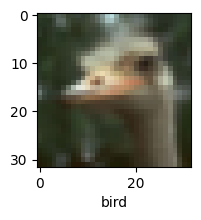

In [ ]:
plot_image(X_train, y_train, 19001)

### Normalize Data

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### Build a model

from warnings import filters
from tensorflow.python.ops.gen_nn_ops import Conv2D
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=34, activation="relu"))
model.add(Dense(units=10), activation="softmax")

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="SGD",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
 141/1563 [=>............................] - ETA: 2:48 - loss: 2.0911 - accuracy: 0.2294

KeyboardInterrupt: ignored

In [ ]:
convolutional_nn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((3,3)),

    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax"),
])


In [ ]:
convolutional_nn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
convolutional_nn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.4625 - accuracy: 0.4750
Epoch 2/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1077 - accuracy: 0.6128
Epoch 3/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9793 - accuracy: 0.6604
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8929 - accuracy: 0.6922
Epoch 5/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.8191 - accuracy: 0.7156
Epoch 6/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7566 - accuracy: 0.7364
Epoch 7/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7043 - accuracy: 0.7557
Epoch 8/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.6540 - accuracy: 0.7715
Epoch 9/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.6074 - accuracy: 0.7863
Epoch 10/10
1563/1563 [==============================] - 78s 50m

In [ ]:
convolutional_nn.save("cnn.h5") # supposed to file path

In [ ]:
convolutional_nn = keras.models.load_model('cnn.h5')

[5 9 0 9 7 2 2]


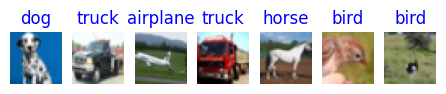

In [ ]:
y_test = y_test.reshape(-1,)
y_number_test_sample = y_test[4724:4731]
print(y_number_test_sample)
y_test_sample = [classes[element] for element in y_number_test_sample]
fig, axs = plt.subplots(1, 7, figsize=(5.5, 5.5))
j=0
for i in range(4724, 4731):
  axs[j].imshow(X_test[i])
  axs[j].set_title(classes[y_test[i]], fontsize=12, color="blue")
  axs[j].set_axis_off()
  j+=1
  

In [ ]:
convolutional_nn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9636 - accuracy: 0.6929


[0.9635583758354187, 0.6929000020027161]

313/313 [==============================] - 6s 19ms/step


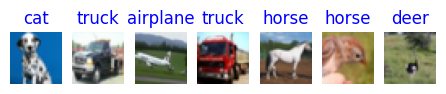

In [ ]:
y_pred = convolutional_nn.predict(X_test)
y_pred[4724:4731]
y_pred_names = [classes[np.argmax(element)] for element in y_pred]
y_pred_names[4724:4731]
fig, axs = plt.subplots(1, 7, figsize=(5.5, 5.5))
j=0
for i in range(4724, 4731):
  axs[j].imshow(X_test[i])
  axs[j].set_title(y_pred_names[i], fontsize=12, color="blue")
  axs[j].set_axis_off()
  j+=1